<br />
<br />

<center><h1><b>Lecture 14</b></h1></center>
<center><h1><b>Data Analysis and More Data Visualization with Python I</b></h1></center>

<center><h4>Time: M56 (13:20 ~ 15:10) and R2 (09:00 ~ 09:50)</h4></center>
<br />

<center><h2>Chieh-En Lee (李杰恩)</h2></center>

<center>
<h4><a href="mailto:celee@nycu.edu.tw">celee@nycu.edu.tw</a></h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs">Introduction to Computer and Computer Science</a>, 2024 Fall</h5></center>


## Last time

- Python package: NumPy  
- Python package: Matplotlib  

## **Today**

<html>
<head>
</head>
<body>
<ul>
  <li><a href="#tag1">Python package: Pandas</a></li>
  <!-- <li><a href="#tag2">More on Python package: Matplotlib</a></li> -->
  <!-- <li><a href="#tag3">???</a></li> -->
</ul>

</body>

<a id="tag1"></a>

## **Python package: `pandas`**  

- `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with **relational** or **labeled** data both easy and intuitive.

- Reference:  
    1. [Pandas documentation](https://pandas.pydata.org/docs/index.html)
    2. [Pandas tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

- - -

#### Install `pandas`

1. Activate your virtual environment

2. Install `pandas`

    ```
    pip install pandas
    ```

    <img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/fig1.png">

- - -

#### DataFrame and Series

- A `DataFrame` is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns.

- Each column in a `DataFrame` is a `Series`.

    <img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/fig2.png">

- - -

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    "Student ID": ["112514001", "112514002", "112514003", "112514004", "112514005"],
    "Gender": ["Female", "Male", "Third", "Female", "Male"],
    "HW#1": [100, 0, 70, 90, 80],
    "HW#2": [90, 60, 95, 85, 100],
    "HW#3": [100, 75, 80, 100, 60],
})

print(df1)

In [ ]:
print(df1["HW#1"])

In [ ]:
print(df1.iloc[0])
print("type(df1.iloc[0]):", type(df1.iloc[0]))

In [ ]:
import numpy as np

hw4 = pd.Series(np.random.randint(0, 100, size=(5,)), name="HW#4")

print(hw4)

In [ ]:
# Add new column
df1["HW#4"] = hw4

print(df1)

In [ ]:
# Add new column from existing columns
df1["Final"] = df1["HW#1"]*0.3 + df1["HW#2"]*0.3 + df1["HW#3"]*0.3 + df1["HW#4"]*0.1

print(df1)

- Using `pd.DataFrame.describe()` to acquire the basic statistics

In [ ]:
# Only for the numerical data
df1.describe()

In [ ]:
# Get dtype of each column
print(df1.dtypes)

# Get the shape of the DataFrame
print(df1.shape)

In [ ]:
# data_range

num = 10
dates = pd.date_range("2050-12-25", periods=5, freq="W-THU")
idx = ["1395140{:02d}".format(i+1) for i in range(num)]

df2 = pd.DataFrame(np.random.randint(0, 3, (num, len(dates))), index=idx, columns=dates)

print(df2)
print(df2.index)
print(df2.columns)

#### Read and write tabular data

- Use `DataFrame.to_*` for exporting data
    1. [to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)
    2. [to_excel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)
    3. ...  
<br>

- Use `pd.read_*` for reading data
    1. [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    2. [read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
    3. ...  

- *Note.* If you want to read `excel` file via `pandas`, you need to install `openpyxl` by `pip install openpyxl` first.

In [ ]:
# exporting df1 as a .csv file

# df1.to_csv("test.csv")

In [ ]:
# importing data from a .csv file
batting = pd.read_csv(".//data//data_batting.csv")

print(batting)

In [ ]:
# Only show the first 5 rows
print(batting.head())

# Change n if you need
# print(batting.head(n=7))

#### Filter a subset of a `DataFrame`

- Example: Extracting the batting statistics of **Albert Pujols**

In [ ]:
# method 1
tmp_list = []

for i in range(batting.shape[0]):
    if batting.iloc[i]["playerID"] == "pujolal01":
        tmp_list.append(batting.iloc[i])

method1 = pd.DataFrame(tmp_list, columns=batting.columns)

print(method1)

In [ ]:
# method 2
method2 = batting[batting["playerID"] == "pujolal01"]

print(method2)

- - -

### Exercise 14.1: calculate the **slugging percentage (SLG)**

- Please write a program that calculates the **slugging percentage (SLG)** of Albert Pujols during his first career in St. Louis Cardinals (2001-2011).

- Please also calculate the average SLG of the entire league during 2001-2011.

- The definition of SLG is:

$$
\text{SLG} = \frac{1 \times (\text{H}) + 2 \times (\text{2B}) + 3 \times (\text{3B}) + 4 \times (\text{HR})}{\text{AB}}
$$

- Please plot the result:

- - -

<img align="center" height=250px width=auto src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/exercise1_1.png">

<img align="center" height=250px width=auto src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/exercise1_2.png">

- - -


#### Example: Read a specific sheet from an `.xlsx` file

- *Note.* If you want to read `excel` file via `pandas`, you need to install `openpyxl` by `pip install openpyxl` first.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2023 = pd.read_excel("./data/data_batting16-24.xlsx", sheet_name="2023")

print(data2023.head(n=7))

print(data2023.columns)

             Player   Age Team  Lg      G     PA     AB      R      H    2B  \
0        CJ Abrams*  22.0  WSN  NL  151.0  614.0  563.0   83.0  138.0  28.0   
1        José Abreu  36.0  HOU  AL  141.0  594.0  540.0   62.0  128.0  23.0   
2     Wilyer Abreu*  24.0  BOS  AL   28.0   85.0   76.0   10.0   24.0   6.0   
3  Ronald Acuña Jr.  25.0  ATL  NL  159.0  735.0  643.0  149.0  217.0  35.0   
4      Willy Adames  27.0  MIL  NL  149.0  638.0  553.0   73.0  120.0  29.0   
5      Jordyn Adams  23.0  LAA  AL   17.0   40.0   39.0    1.0    5.0   0.0   
6       Riley Adams  27.0  WSN  NL   44.0  158.0  143.0    8.0   39.0  13.0   

   ...    CS    BB     SO     TB  GIDP   HBP   SH   SF  IBB  Player-additional  
0  ...   4.0  32.0  118.0  232.0   7.0  13.0  3.0  3.0  2.0          abramcj01  
1  ...   1.0  42.0  130.0  207.0  16.0   6.0  0.0  6.0  1.0          abreujo02  
2  ...   1.0   9.0   23.0   36.0   0.0   0.0  0.0  0.0  0.0          abreuwi02  
3  ...  14.0  80.0   84.0  383.0  15.0   9.

- - -

### Exercise 14.2: calculate the **OPS+**

- Please write a program that calculates the **On-base Plus Slugging Plus ($\bold{OPS^+}$)** of all players that had played in MLB 2023 seasons.

- The definitions of *Batting Average (BA)*, *On-based Percentage (OBP)*, *On-based Plus Slugging (OPS)*, and *$OPS^+$* are:

$$
\begin{aligned}

\text{BA} &= \frac{\text{H}}{\text{AB}}\\

\text{OBP} &= \frac{\text{H} + \text{BB} + \text{HBP}}{\text{AB}}\\

\text{SLG} &= \frac{1 \times (\text{H}) + 2 \times (\text{2B}) + 3 \times (\text{3B}) + 4 \times (\text{HR})}{\text{AB}}\\

\text{OPS} &= \text{OBP} + \text{SLG}\\

\text{OPS}^+ &= 100*[\frac{\text{player OBP}}{\text{league OBP}} + \frac{\text{player SLG}}{\text{league SLG}} - 1]\\

\end{aligned}
$$

- [Your data is here.](.//data/data_batting_2021-2023.xlsx)

- Please plot the result:

<details><summary>Style 1</summary>

<img align="center" height=auto width=800px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/exercise2_1.png">

</details>

<br>

<details><summary>Style 2</summary>

<img align="center" height=auto width=800px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/exercise2_2.png">

</details>

- - -

#### Twin axes 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def processData(df: pd.DataFrame) -> tuple:
    data = df.copy()
    # PA >= 100
    data = data[data["PA"] >= 50]
    # BA
    data["BA"] = data["H"]/data["AB"]
    # OBP
    data["OBP"] = (data["H"] + data["BB"] + data["HBP"])/data["PA"]
    # SLG
    data["SLG"] = (
        (data["H"]-data["2B"]-data["3B"]-data["HR"])*1 + \
        data["2B"]*2 + data["3B"]*3 + data["HR"]*4
    )/data["AB"]
    # OPS
    data["OPS"] = data["OBP"] + data["SLG"]
    # OPS+
    data["OPS+"] = 100*((data["SLG"]/np.mean(data["SLG"])) + (data["OBP"]/np.mean(data["OBP"])) - 1)
    # Extract data
    data = data.sort_values(by="OPS+", ascending=False)

    players, ops_plus, ba = [], [], []

    for i in range(5):
        players.append(data.iloc[i]["Player"])
        ops_plus.append(data.iloc[i]["OPS+"])
        ba.append(data.iloc[i]["BA"])

    for i in range(15):
        pick = np.random.randint(5, data.shape[0])
        players.append(data.iloc[pick]["Player"])
        ops_plus.append(data.iloc[pick]["OPS+"])
        ba.append(data.iloc[pick]["BA"])
    return (data, players, ops_plus, ba)


def plotStyle1(df: pd.DataFrame):
    """
    Plot a figure with twin axes, style 1
    """
    # Data preprocessing
    data, players, ops_plus, ba = processData(df)
    
    # Create Figure
    fig = plt.figure(1, figsize=(12,4), dpi=100, facecolor="w")

    # Create Axes
    ax = fig.add_subplot(111)

    # Plot OPS+ with scatter plot
    ax.scatter(range(len(players)), ops_plus, c="r")

    # Plot a horizontal line for league average OPS+
    ax.plot(
        range(len(players)), 
        np.ones((len(players),))*100, 
        'r--', 
        label=r"League average OPS$^+$",
    )

    # Customized the labels and ticks of x- and y-axes
    ax.set_ylabel(r"OPS$^+$", color='r')
    ax.set_xticks(range(len(players)))
    ax.set_xticklabels(players, fontsize=8)
    for label in ax.get_xticklabels():  # x ticklabels
        label.set_rotation(40)          # label rotation
        label.set_horizontalalignment('center')
    ax.tick_params(axis='x', which='both', direction='inout')  # tick style
    ax.tick_params(axis='y', labelcolor='r')

    # Create twin-axis on the same Axes
    ax2 = ax.twinx()

    # Plot batting average with scatter plot
    ax2.scatter(range(len(players)), ba, c="b")

    # Plot a horizontal line for league average BA
    ax2.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["BA"]), 
        'b--', 
        label="Average BA = {:.03f}".format(np.mean(data["BA"])),
    )
    
    # Customized the labels and ticks of y-axes
    ax2.set_ylabel("BA", color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    # Set title and legend
    fig.suptitle(r"OPS$^+$ vs BA of players")
    fig.legend(labelcolor='linecolor')

    plt.show()


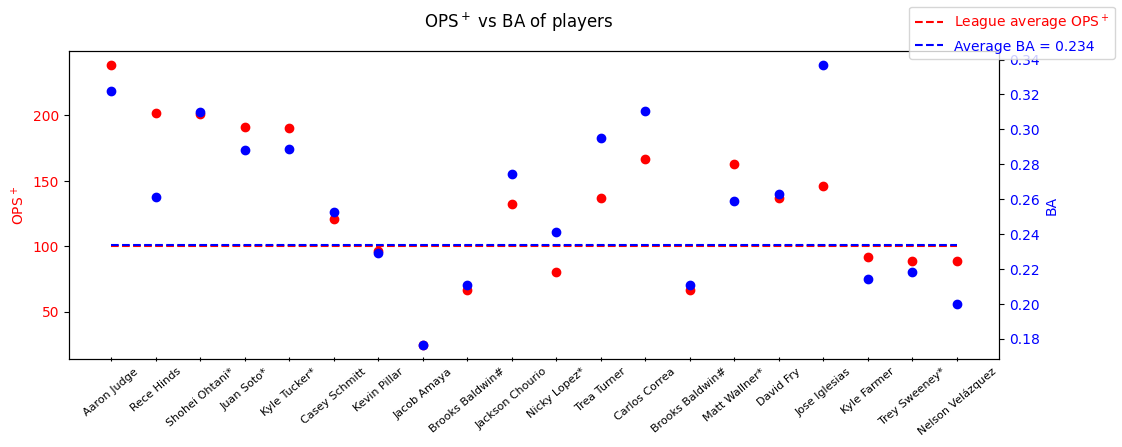

In [17]:
data2024 = pd.read_excel("./data/data_batting16-24.xlsx", sheet_name="2024")

plotStyle1(data2024)

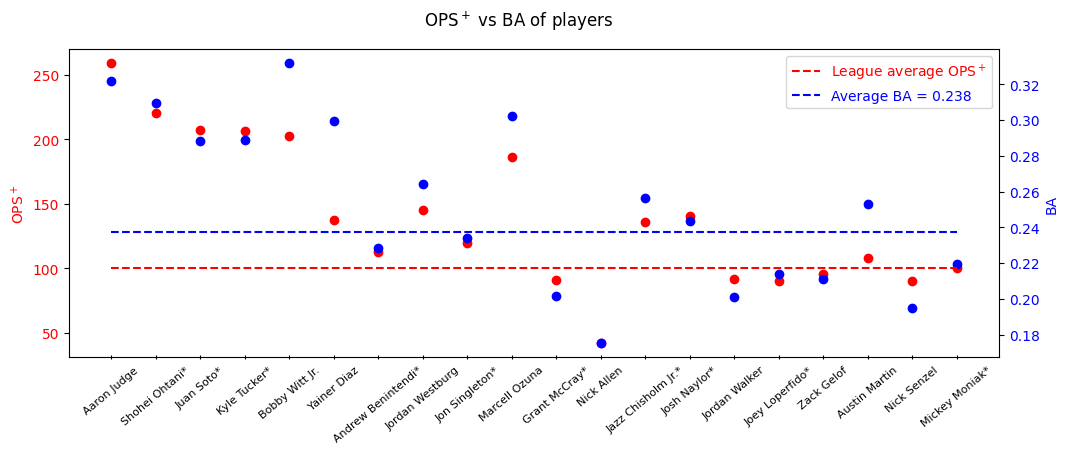

In [13]:
from mpl_toolkits.axes_grid1 import host_subplot

def plotStyle2(df: pd.DataFrame):
    """
    Plot a figure with twin axes, style 2
    """
    # Data preprocessing
    data, players, ops_plus, ba = processData(df)

    # Create Figure
    fig2 = plt.figure(2, figsize=(12,4), dpi=100, facecolor="w")
    
    # Create axes that can act as a hosts to parasitic axes
    host = host_subplot(111)
    par = host.twinx()

    # Plot OPS+ and BA in host and parasite axes
    host.scatter(range(len(players)), ops_plus, c="r")
    par.scatter(range(len(players)), ba, c="b")

    # Plot league avearge in host and parasite axes
    host.plot(
        range(len(players)), 
        np.ones((len(players),))*100, 
        'r--', 
        label=r"League average OPS$^+$",
    )
    par.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["BA"]), 
        'b--', 
        label="Average BA = {:.03f}".format(np.mean(data["BA"])),
    )

    # Customized the labels and ticks of host
    host.set_ylabel(r"OPS$^+$", color='r')
    host.set_xticks(range(len(players)))
    host.set_xticklabels(players, fontsize=8)
    for label in host.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('center')
    host.tick_params(axis='x', which='both', direction='inout')
    host.tick_params(axis='y', labelcolor='r')

    # Create legend in host
    host.legend(labelcolor="linecolor")

    # Customized the labels and ticks of parasite
    par.set_ylabel("BA", color='b')
    par.tick_params(axis='y', labelcolor='b')

    # Create title
    fig2.suptitle(r"OPS$^+$ vs BA of players")

    plt.show()

plotStyle2(data2024)

### Exercise 14.3: calculate the **wOBA**, **wRAA**, and **wRC**

- Please write a program that calculates the **weighted on-base average (wOBA)**, **weighted runs above average (wRAA)**, and **weighted Runs Created (wRC)** of all player that had played in MLB 2023 season.

- [Your data is here.](.//data/data_batting16-24.xlsx)

- The definitions of **wOBA**, **wRAA**, and **wRC** of MLB 2023 are:

$$
\begin{aligned}
\text{wOBA} &= \frac{0.696 \cdot \text{uBB} + 0.726 \cdot \text{HBP} + 0.883 \cdot \text{1B}+ 1.244 \cdot \text{2B} + 1.569 \cdot \text{3B} + 2.004 \cdot \text{HR}}{\text{AB} + \text{BB} - \text{IBB} + \text{SF} + \text{HBP}}\\

\text{uBB} &= \text{BB} - \text{IBB}\\

\text{wRC} &= (\frac{\text{wOBA} - \text{league wOBA}}{\text{wOBA scale}} + \text{league \(\frac {\text{R}}{\text{PA}}\)}) \times \text{PA}\\

\text{wRC} &= (\frac{\text{wOBA} - 0.318}{1.204} + 0.122) \times \text{PA}

\end{aligned}
$$

- Please plot the result:


<details><summary>Style 1</summary>

<img align="center" height=auto width=800px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/exercise3_1.png">

</details>

<br>

<details><summary>Style 2</summary>

<img align="center" height=auto width=800px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture14/assets/exercise3_2.png">

</details>

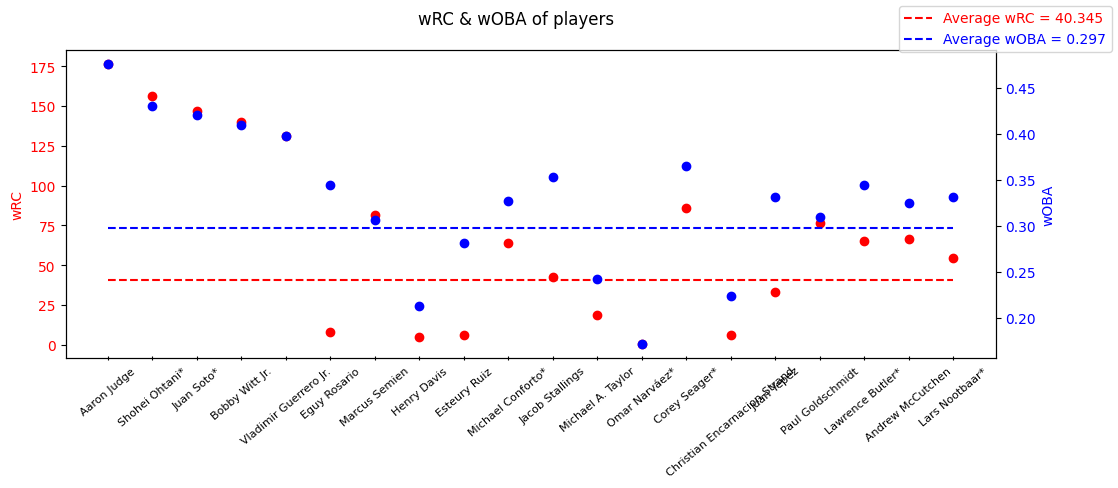

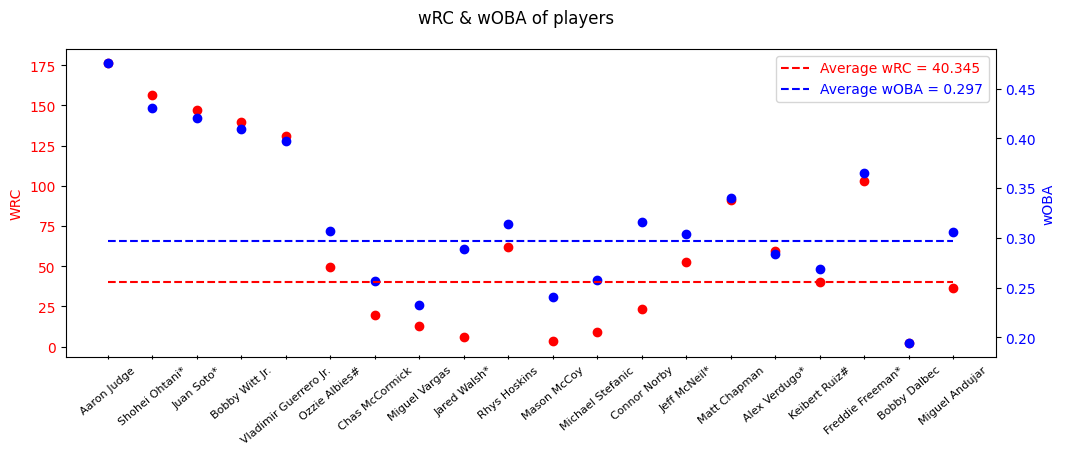

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def loadData(year: int = 2024):
    data = pd.read_excel("./data/data_batting16-24.xlsx", sheet_name=str(year))
    tmp = pd.read_csv("./data/mlb_constants.csv")
    constants = tmp[tmp["Season"] == year]
    return (data, constants)


def processData_143(year: int = 2024) -> tuple:
    data, const = loadData(year=year)

    # PA >= 50
    data = data[data["PA"] >= 50]
    # BA
    data["BA"] = data["H"]/data["AB"]
    # uBB
    data["uBB"] = data["BB"] - data["IBB"]
    # wOBA
    data["wOBA"] = (
        const["wBB"].to_numpy()[0] * data["uBB"] + \
        const["wHBP"].to_numpy()[0] * data["HBP"] + \
        const["w1B"].to_numpy()[0] * (data["H"] - data["2B"] - data["3B"] - data["HR"]) + \
        const["w2B"].to_numpy()[0] * data["2B"] + \
        const["w3B"].to_numpy()[0] * data["3B"] + \
        const["wHR"].to_numpy()[0] * data["HR"]
    )/(data["AB"] + data["uBB"] + data["SF"] + data["HBP"])
    # wRC
    data["wRC"] = (
        (data["wOBA"] - const["wOBA"].to_numpy()[0]) \
            / const["wOBAScale"].to_numpy()[0] + const["R/PA"].to_numpy()[0]
    )*data["PA"]

    # Extract data
    data = data.sort_values(by="wRC", ascending=False)

    players, wRC, wOBA = [], [], []

    for i in range(5):
        players.append(data.iloc[i]["Player"])
        wRC.append(data.iloc[i]["wRC"])
        wOBA.append(data.iloc[i]["wOBA"])

    for i in range(15):
        pick = np.random.randint(5, data.shape[0])
        players.append(data.iloc[pick]["Player"])
        wRC.append(data.iloc[pick]["wRC"])
        wOBA.append(data.iloc[pick]["wOBA"])
    return (data, players, wRC, wOBA)


def plotStyle1(year: int = 2024):
    """
    Plot a figure with twin axes, style 1
    """
    # Data preprocessing
    data, players, wRC, wOBA = processData_143(year=year)
    
    # Create Figure
    fig = plt.figure(1, figsize=(12,4), dpi=100, facecolor="w")

    # Create Axes
    ax = fig.add_subplot(111)

    # Plot OPS+ with scatter plot
    ax.scatter(range(len(players)), wRC, c="r")

    # Plot a horizontal line for league average OPS+
    ax.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wRC"]), 
        'r--', 
        label="Average wRC = {:.03f}".format(np.mean(data["wRC"])),
    )

    # Customized the labels and ticks of x- and y-axes
    ax.set_ylabel("wRC", color='r')
    ax.set_xticks(range(len(players)))
    ax.set_xticklabels(players, fontsize=8)
    for label in ax.get_xticklabels():  # x ticklabels
        label.set_rotation(40)          # label rotation
        label.set_horizontalalignment('center')
    ax.tick_params(axis='x', which='both', direction='inout')  # tick style
    ax.tick_params(axis='y', labelcolor='r')

    # Create twin-axis on the same Axes
    ax2 = ax.twinx()

    # Plot batting average with scatter plot
    ax2.scatter(range(len(players)), wOBA, c="b")

    # Plot a horizontal line for league average BA
    ax2.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wOBA"]), 
        'b--', 
        label="Average wOBA = {:.03f}".format(np.mean(data["wOBA"])),
    )
    
    # Customized the labels and ticks of y-axes
    ax2.set_ylabel("wOBA", color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    # Set title and legend
    fig.suptitle("wRC & wOBA of players")
    fig.legend(labelcolor='linecolor')

    plt.show()

def plotStyle2(year: int = 2024):
    """
    Plot a figure with twin axes, style 2
    """
    # Data preprocessing
    data, players, wRC, wOBA = processData_143(year=year)

    # Create Figure
    fig2 = plt.figure(2, figsize=(12,4), dpi=100, facecolor="w")
    
    # Create axes that can act as a hosts to parasitic axes
    host = host_subplot(111)
    par = host.twinx()

    # Plot OPS+ and BA in host and parasite axes
    host.scatter(range(len(players)), wRC, c="r")
    par.scatter(range(len(players)), wOBA, c="b")

    # Plot league avearge in host and parasite axes
    host.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wRC"]), 
        'r--', 
        label="Average wRC = {:.03f}".format(np.mean(data["wRC"])),
    )
    par.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wOBA"]), 
        'b--', 
        label="Average wOBA = {:.03f}".format(np.mean(data["wOBA"])),
    )

    # Customized the labels and ticks of host
    host.set_ylabel("WRC", color='r')
    host.set_xticks(range(len(players)))
    host.set_xticklabels(players, fontsize=8)
    for label in host.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('center')
    host.tick_params(axis='x', which='both', direction='inout')
    host.tick_params(axis='y', labelcolor='r')

    # Create legend in host
    host.legend(labelcolor="linecolor")

    # Customized the labels and ticks of parasite
    par.set_ylabel("wOBA", color='b')
    par.tick_params(axis='y', labelcolor='b')

    # Create title
    fig2.suptitle("wRC & wOBA of players")

    plt.show()


def solutionExercise143(year: int = 2024, style = None):
    if style == 1:
        plotStyle1(year=year)
    if style == 2:
        plotStyle2(year=year)
    else:
        plotStyle1(year=year)
        plotStyle2(year=year)

solutionExercise143()


## Reference

The data of this lecture is from [Baseball Reference](https://www.baseball-reference.com/), [FanGraphs BaseBall](https://www.fangraphs.com/), and [Kaggle.com](https://www.kaggle.com/datasets/saurabhshahane/major-league-baseball-dataset).


<details><summary>Don't click this</summary>

<details><summary>Exercise 14.1</summary>

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

batting = pd.read_csv(".//data//data_batting.csv")
pujols = batting[batting["playerID"] == "pujolal01"]

data = pujols[pujols["teamID"] == "SLN"][["playerID", "yearID", "teamID", "AB", "H", "2B", "3B", "HR"]]

data["SLG"] = (((data["H"]-data["2B"]-data["3B"]-data["HR"]) + 2*data["2B"] + 3*data["3B"] + 4*data["HR"])/data["AB"]).round(2)

slg_all = []

for i in range(data.shape[0]):
    data_all = batting[batting["yearID"] == (2001+i) ][["playerID", "yearID", "teamID", "AB", "H", "2B", "3B", "HR"]]
    data_all["SLG"] = (((data_all["H"]-data_all["2B"]-data_all["3B"]-data_all["HR"]) + \
        2*data_all["2B"] + 3*data_all["3B"] + 4*data_all["HR"])/data_all["AB"])

    slg_all.append(data_all["SLG"].mean())    

data["League SLG"] = slg_all

fig = plt.figure(1, figsize=(6,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot(data["yearID"], data["SLG"], label="Albert Pujols")
ax.plot(data["yearID"], data["League SLG"], label="League SLG")
ax.set_title("Albert Pujols' Batting Status", fontweight='bold')
ax.set_xlabel("Year", fontweight='bold')
ax.set_ylabel("SLG", fontweight='bold')
ax.grid(True)
ax.legend()

plt.show()
```

</details>


<details><summary>Exercise 14.3</summary>

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def loadData(year: int = 2024):
    data = pd.read_excel("./data/data_batting16-24.xlsx", sheet_name=str(year))
    tmp = pd.read_csv("./data/mlb_constants.csv")
    constants = tmp[tmp["Season"] == year]
    return (data, constants)


def processData_143(year: int = 2024) -> tuple:
    data, const = loadData(year=year)

    # PA >= 50
    data = data[data["PA"] >= 50]
    # BA
    data["BA"] = data["H"]/data["AB"]
    # uBB
    data["uBB"] = data["BB"] - data["IBB"]
    # wOBA
    data["wOBA"] = (
        const["wBB"].to_numpy()[0] * data["uBB"] + \
        const["wHBP"].to_numpy()[0] * data["HBP"] + \
        const["w1B"].to_numpy()[0] * (data["H"] - data["2B"] - data["3B"] - data["HR"]) + \
        const["w2B"].to_numpy()[0] * data["2B"] + \
        const["w3B"].to_numpy()[0] * data["3B"] + \
        const["wHR"].to_numpy()[0] * data["HR"]
    )/(data["AB"] + data["uBB"] + data["SF"] + data["HBP"])
    # wRC
    data["wRC"] = (
        (data["wOBA"] - const["wOBA"].to_numpy()[0]) \
            / const["wOBAScale"].to_numpy()[0] + const["R/PA"].to_numpy()[0]
    )*data["PA"]

    # Extract data
    data = data.sort_values(by="wRC", ascending=False)

    players, wRC, wOBA = [], [], []

    for i in range(5):
        players.append(data.iloc[i]["Player"])
        wRC.append(data.iloc[i]["wRC"])
        wOBA.append(data.iloc[i]["wOBA"])

    for i in range(15):
        pick = np.random.randint(5, data.shape[0])
        players.append(data.iloc[pick]["Player"])
        wRC.append(data.iloc[pick]["wRC"])
        wOBA.append(data.iloc[pick]["wOBA"])
    return (data, players, wRC, wOBA)


def plotStyle1(year: int = 2024):
    """
    Plot a figure with twin axes, style 1
    """
    # Data preprocessing
    data, players, wRC, wOBA = processData_143(year=year)
    
    # Create Figure
    fig = plt.figure(1, figsize=(12,4), dpi=100, facecolor="w")

    # Create Axes
    ax = fig.add_subplot(111)

    # Plot OPS+ with scatter plot
    ax.scatter(range(len(players)), wRC, c="r")

    # Plot a horizontal line for league average OPS+
    ax.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wRC"]), 
        'r--', 
        label="Average wRC = {:.03f}".format(np.mean(data["wRC"])),
    )

    # Customized the labels and ticks of x- and y-axes
    ax.set_ylabel("wRC", color='r')
    ax.set_xticks(range(len(players)))
    ax.set_xticklabels(players, fontsize=8)
    for label in ax.get_xticklabels():  # x ticklabels
        label.set_rotation(40)          # label rotation
        label.set_horizontalalignment('center')
    ax.tick_params(axis='x', which='both', direction='inout')  # tick style
    ax.tick_params(axis='y', labelcolor='r')

    # Create twin-axis on the same Axes
    ax2 = ax.twinx()

    # Plot batting average with scatter plot
    ax2.scatter(range(len(players)), wOBA, c="b")

    # Plot a horizontal line for league average BA
    ax2.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wOBA"]), 
        'b--', 
        label="Average wOBA = {:.03f}".format(np.mean(data["wOBA"])),
    )
    
    # Customized the labels and ticks of y-axes
    ax2.set_ylabel("wOBA", color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    # Set title and legend
    fig.suptitle("wRC & wOBA of players")
    fig.legend(labelcolor='linecolor')

    plt.show()

def plotStyle2(year: int = 2024):
    """
    Plot a figure with twin axes, style 2
    """
    # Data preprocessing
    data, players, wRC, wOBA = processData_143(year=year)

    # Create Figure
    fig2 = plt.figure(2, figsize=(12,4), dpi=100, facecolor="w")
    
    # Create axes that can act as a hosts to parasitic axes
    host = host_subplot(111)
    par = host.twinx()

    # Plot OPS+ and BA in host and parasite axes
    host.scatter(range(len(players)), wRC, c="r")
    par.scatter(range(len(players)), wOBA, c="b")

    # Plot league avearge in host and parasite axes
    host.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wRC"]), 
        'r--', 
        label="Average wRC = {:.03f}".format(np.mean(data["wRC"])),
    )
    par.plot(
        range(len(players)), 
        np.ones((len(players),))*np.mean(data["wOBA"]), 
        'b--', 
        label="Average wOBA = {:.03f}".format(np.mean(data["wOBA"])),
    )

    # Customized the labels and ticks of host
    host.set_ylabel("WRC", color='r')
    host.set_xticks(range(len(players)))
    host.set_xticklabels(players, fontsize=8)
    for label in host.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('center')
    host.tick_params(axis='x', which='both', direction='inout')
    host.tick_params(axis='y', labelcolor='r')

    # Create legend in host
    host.legend(labelcolor="linecolor")

    # Customized the labels and ticks of parasite
    par.set_ylabel("wOBA", color='b')
    par.tick_params(axis='y', labelcolor='b')

    # Create title
    fig2.suptitle("wRC & wOBA of players")

    plt.show()


def solutionExercise143(year: int = 2024, style = None):
    if style == 1:
        plotStyle1(year=year)
    if style == 2:
        plotStyle2(year=year)
    else:
        plotStyle1(year=year)
        plotStyle2(year=year)

solutionExercise143()


</details>


</details>

